<a href="https://colab.research.google.com/github/FatemaSamir/Head-Pose-Estimation/blob/main/Head_pose_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.4 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pickle
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read Data 

In [3]:
# Read Data
Data = pd.read_csv('/content/drive/MyDrive/Ml1_project/Notebookes/All_DataSet.csv',index_col=0)
print(Data.shape)

(1853, 940)


In [5]:
Data.head()

,ID,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F930,F931,F932,F933,F934,F935,F936,Pitch,Yaw,Roll
0,image00002.jpg,0.485651,0.686890,0.489194,0.639721,0.489802,0.647256,0.479730,0.562529,0.490558,...,0.492813,0.541429,0.500371,0.665668,0.471336,0.676091,0.464005,-0.399231,0.018227,0.085676
1,image00004.jpg,0.441502,0.642091,0.417273,0.592251,0.448839,0.610546,0.435994,0.545069,0.415757,...,0.511724,0.500658,0.514913,0.584451,0.500244,0.594060,0.495387,0.470065,1.189533,0.300959
2,image00006.jpg,0.317797,0.799190,0.321328,0.776498,0.318316,0.782066,0.311064,0.745973,0.321459,...,0.720868,0.328639,0.723342,0.373404,0.713071,0.377643,0.709798,-0.184650,0.881137,-0.236852
3,image00008.jpg,0.503922,0.694309,0.469521,0.653913,0.489504,0.658751,0.444433,0.590285,0.461756,...,0.510606,0.490586,0.518652,0.595615,0.455611,0.602670,0.444623,-0.175379,0.299208,-0.373374
4,image00013.jpg,0.510238,0.669038,0.492729,0.604797,0.499756,0.624468,0.467368,0.542362,0.488200,...,0.488652,0.505667,0.492681,0.602484,0.452699,0.611310,0.448576,-0.026812,0.011965,-0.220662


In [6]:
Data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F930,F931,F932,F933,F934,F935,F936,Pitch,Yaw,Roll
count,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,...,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000
mean,0.505036,0.666149,0.503698,0.611075,0.504510,0.627596,0.490213,0.550968,0.503416,0.592989,...,0.503258,0.530948,0.507431,0.621081,0.485716,0.629547,0.478221,-0.095366,0.013611,-0.033167
std,0.041261,0.028346,0.053271,0.029041,0.037840,0.024675,0.044587,0.023908,0.054824,0.028645,...,0.023010,0.033922,0.022426,0.047496,0.038984,0.050135,0.041212,0.549292,0.580266,0.649282
min,0.256906,0.179093,0.227159,0.144636,0.249772,0.152404,0.222207,0.100594,0.223030,0.131856,...,0.055864,0.266672,0.060640,0.304541,0.032022,0.294275,0.024076,-12.457202,-6.130066,-16.969362
25%,0.482141,0.652247,0.469521,0.598221,0.481937,0.617026,0.460069,0.540801,0.466724,0.580285,...,0.491350,0.514206,0.496217,0.593103,0.463229,0.601160,0.454632,-0.246453,-0.256714,-0.160274
50%,0.505162,0.668768,0.501536,0.614621,0.503587,0.629840,0.485371,0.552197,0.501211,0.596475,...,0.502106,0.532342,0.506317,0.626023,0.485355,0.635011,0.477745,-0.123371,0.019403,-0.017463
75%,0.526248,0.682794,0.537543,0.627792,0.525717,0.641242,0.516599,0.562998,0.538674,0.609476,...,0.513950,0.546662,0.517966,0.650143,0.506548,0.660787,0.499799,0.028133,0.305791,0.126460
max,0.928491,0.799190,0.929157,0.776498,0.923774,0.782066,0.901552,0.745973,0.926027,0.767816,...,0.720868,0.908686,0.723342,0.990572,0.741343,0.998658,0.750775,15.598820,3.277500,2.166107


# Preparing Data

In [4]:
# Split Data to Featuers and Labels
X = Data.drop(['ID','Pitch','Yaw',	'Roll' ], axis=1)
Y = Data[['Pitch','Yaw',	'Roll' ]]
print(X.shape)
print(Y.shape)

(1853, 936)
(1853, 3)


In [11]:
# Center Data around Nose 
n_features = 468*2
def center_keypoints(df):
  for i in range(1, n_features + 1):
    feature = 'F' + str(i)

    if i % 2 != 0:
      df[feature] = df[feature] - Data['F3']
    
    else:
      df[feature] = df[feature] - Data['F4']

centered_Data = X.copy()
center_keypoints(centered_Data)
centered_Data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F927,F928,F929,F930,F931,F932,F933,F934,F935,F936
0,-0.003543,0.047169,0.0,0.0,0.000608,0.007535,-0.009464,-0.077192,0.001364,-0.018508,...,0.070518,-0.154585,0.059243,-0.146908,0.052235,-0.139350,0.176474,-0.168385,0.186897,-0.175716
1,0.024229,0.049840,0.0,0.0,0.031566,0.018295,0.018721,-0.047182,-0.001516,-0.015286,...,0.105195,-0.085295,0.094120,-0.080527,0.083385,-0.077338,0.167178,-0.092007,0.176787,-0.096864
2,-0.003530,0.022692,0.0,0.0,-0.003012,0.005568,-0.010264,-0.030525,0.000131,-0.008681,...,0.013085,-0.058703,0.009006,-0.055630,0.007312,-0.053156,0.052077,-0.063427,0.056315,-0.066700
3,0.034401,0.040395,0.0,0.0,0.019983,0.004837,-0.025088,-0.063628,-0.007765,-0.016300,...,0.038046,-0.152955,0.028210,-0.143307,0.021064,-0.135261,0.126094,-0.198303,0.133149,-0.209290
4,0.017510,0.064241,0.0,0.0,0.007027,0.019671,-0.025361,-0.062435,-0.004529,-0.020096,...,0.027772,-0.122885,0.018014,-0.116145,0.012938,-0.112116,0.109755,-0.152098,0.118581,-0.156221


In [20]:
# normalze divide all data over distance betweent 2 points
def norm_dist (Data, index_point1, index_point2):
  X_1 = Data['F'+str(index_point1)]
  X_2 = Data['F'+str(index_point1+1)]
  Y_1 = Data['F'+str(index_point2)]
  Y_2 = Data['F'+str(index_point2+1)]
  # computing the distance
  dist = np.linalg.norm(np.array((X_1,X_2)) - np.array((Y_1,Y_2)),axis = 0).reshape(-1,1)
  Data_norm = Data / dist
  return Data_norm

Data_norm = norm_dist (centered_Data, 33, 61)
Data_norm.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F927,F928,F929,F930,F931,F932,F933,F934,F935,F936
0,-0.010118,0.134691,0.0,0.0,0.001737,0.021516,-0.027025,-0.220422,0.003896,-0.052850,...,0.201365,-0.441417,0.169168,-0.419497,0.149156,-0.397914,0.503923,-0.480824,0.533684,-0.501758
1,0.128347,0.264015,0.0,0.0,0.167215,0.096912,0.099170,-0.249936,-0.008031,-0.080972,...,0.557242,-0.451829,0.498577,-0.426571,0.441710,-0.409678,0.885584,-0.487382,0.936487,-0.513112
2,-0.025076,0.161178,0.0,0.0,-0.021393,0.039549,-0.072904,-0.216814,0.000933,-0.061663,...,0.092940,-0.416962,0.063970,-0.395129,0.051934,-0.377556,0.369892,-0.450511,0.399998,-0.473758
3,0.128148,0.150479,0.0,0.0,0.074438,0.018020,-0.093458,-0.237025,-0.028928,-0.060721,...,0.141727,-0.569780,0.105085,-0.533840,0.078468,-0.503867,0.469719,-0.738706,0.495998,-0.779635
4,0.065007,0.238506,0.0,0.0,0.026089,0.073032,-0.094157,-0.231800,-0.016814,-0.074610,...,0.103108,-0.456234,0.066882,-0.431210,0.048034,-0.416252,0.407484,-0.564690,0.440253,-0.579997


In [21]:
# split Centerd Data to Train and Validation
X_train, X_val, Y_train, Y_val = train_test_split(Data_norm, Y, test_size=0.2, random_state =42)

In [5]:
# split Original Data Train and Validation
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state =42)

In [13]:
X_train.head(3)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F927,F928,F929,F930,F931,F932,F933,F934,F935,F936
820,0.024563,0.030375,0.0,0.0,0.017221,0.008279,-0.006495,-0.053535,-0.002430,-0.014942,...,0.064794,-0.102513,0.055129,-0.098830,0.047557,-0.095150,0.146440,-0.115063,0.156403,-0.121877
244,-0.013135,0.067985,0.0,0.0,-0.011380,0.023529,-0.017854,-0.067427,0.002508,-0.021410,...,0.022233,-0.103972,0.014981,-0.101543,0.013063,-0.100169,0.099287,-0.100331,0.108040,-0.107673
1223,-0.018970,0.050097,0.0,0.0,-0.019381,0.016077,-0.022193,-0.049142,0.002454,-0.015352,...,-0.009181,-0.085719,-0.012941,-0.082399,-0.012133,-0.079949,0.045742,-0.091755,0.051048,-0.098030


# **Models**

# Multioutput Regression

In [7]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# create model
model = LinearRegression()
# evaluate model model = KNeighborsRegressor()
scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv)

# fit model
lr = model.fit(X_train,Y_train)
# make a prediction

yhat = model.predict(X_val)
# summarize prediction
print(yhat[0])
print('Training Score:\n', lr.score(X_val, Y_val))

[-0.12389471  0.05143102 -0.30952061]
Training Score:
 -1.1093443435533403


In [8]:
cv = KFold(n_splits=10)
# create model
model = LinearRegression()
# evaluate model model = KNeighborsRegressor()
scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv)

# fit model
lr = model.fit(X_train,Y_train)
# make a prediction

yhat = model.predict(X_val)
# summarize prediction
print(yhat[0])
print('Training Score:\n', lr.score(X_val, Y_val))

[-0.12389471  0.05143102 -0.30952061]
Training Score:
 -1.1093443435533403


In [23]:
cv = KFold(n_splits=10)
# create model
model = KNeighborsRegressor()
# evaluate model 
scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# fit model
lr = model.fit(X_train,Y_train)
# make a prediction

yhat = model.predict(X_val)
# summarize prediction
print(yhat[0])
print('Training Score:\n', lr.score(X_val, Y_val))

[-0.3794231  -0.00058381 -0.03033631]
Training Score:
 -0.08918175935492778


In [24]:
cv = KFold(n_splits=10)
# create model
model =  LinearSVR()
# evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
# fit model
lSVR = MultiOutputRegressor(model).fit(X_train, Y_train)
# make a prediction

yhat = lSVR.predict(X_val)
# summarize prediction
print(yhat[0])
print('Training Score:\n', lSVR.score(X_val, Y_val))

[-0.31098098 -0.04776104  0.01458233]
Training Score:
 0.7743180476170216


In [25]:
# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model).fit(X_train, Y_train)
print('Training Score:\n', wrapper.score(X_val, Y_val))

Training Score:
 0.796080362701109


In [9]:
svr = MultiOutputRegressor(SVR(C=30)).fit(X_train, Y_train)
print('Training Score:\n', svr.score(X_val, Y_val))

Training Score:
 0.7047732702452051


In [10]:
svr = MultiOutputRegressor(SVR()).fit(X_train, Y_train)
print('Training Score:\n', svr.score(X_val, Y_val))

Training Score:
 0.8433700927225652


In [28]:
svr = MultiOutputRegressor(SVR()).fit(X_train, Y_train)
print('Training Score:\n', svr.score(X_val, Y_val))

Training Score:
 0.8506483316973963


#### *k-Nearest Neighbors for Multioutput Regression*

In [38]:
# define model
def KNearst(x_train, y_train, x_val, y_val, n_neighbors):
  model = KNeighborsRegressor(n_neighbors=n_neighbors)
  # fit model
  model.fit(x_train, y_train)
  score_knn = model.score(x_val, y_val)
  print(score_knn)
  return model 

KNN = KNearst(X_train, Y_train, X_val, Y_val, 30)


0.7797356038392813


In [57]:
# save model 
with open('/content/drive/MyDrive/Ml1_project/Notebookes/model_SVR85.pkl', 'wb') as file:
        pickle.dump(svr, file)

# Draw

In [11]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

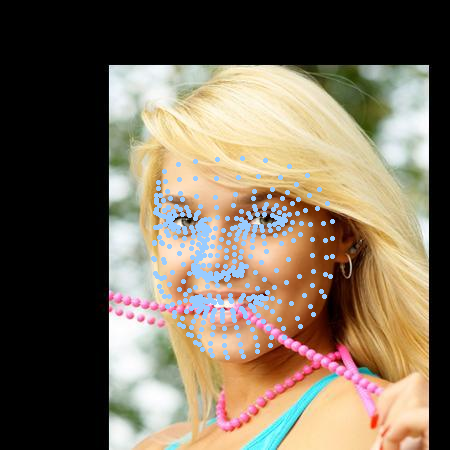

In [13]:
# choosing random image from the testing data
# choosing random image
random_file = 'image00098'
faceModule = mp.solutions.face_mesh
featuers = []
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread('/content/drive/MyDrive/Ml1_project/Images/'+random_file+'.jpg')
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          for landmark in face.landmark:
              x = landmark.x
              y = landmark.y
              featuers.append(x)
              featuers.append(y)
              # print(x)
              # print(y)
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape 
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
              cv2.circle(image, (relative_x, relative_y), radius=1, color=(255, 204, 153), thickness=2)
      cv2_imshow(image)

In [22]:
featuers = np.array(featuers).reshape(1,-1)

# center featuers around nose
featuers[:,[i for i in range(1,(468*2)+1,2)]] = featuers[:,[i for i in range(1,(468*2)+1,2)]] - featuers[:,3]
featuers[:,[i for i in range(0,(468*2),2)]] = featuers[:,[i for i in range(0,(468*2),2)]] - featuers[:,4]

# norm 
dist = np.linalg.norm(np.array((featuers[:,33],featuers[:,61])) - np.array((featuers[:,34],featuers[:,62])),axis = 0).reshape(-1,1)
Data_norm = featuers / dist
# y_pred = svr.predict(featuers)
# # print(featuers)
# print(y_pred)
# Data_norm

In [23]:
# featuers[:,[i for i in range(1,(468*2)+1,2)]] - featuers[:,3]

In [ ]:
[i for i in range(0,(468*2)+1,2)]

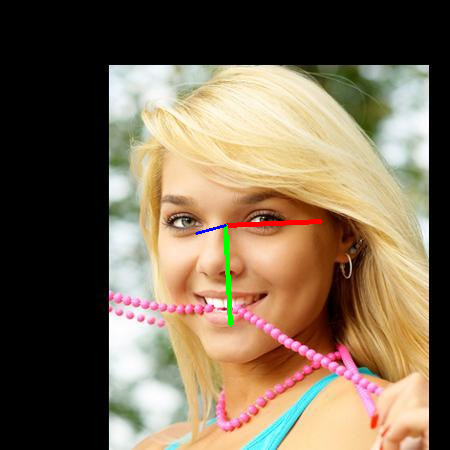

In [15]:
# Draw predectid image
image = cv2.imread('/content/drive/MyDrive/Ml1_project/Images/'+random_file+'.jpg')
pitch = y_pred[0][0]
yaw = y_pred[0][1]
roll = y_pred[0][2]
cv2_imshow(draw_axis(image,pitch,yaw,roll))

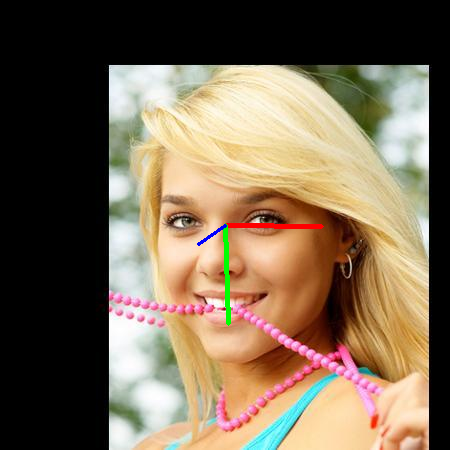

In [53]:
# Draw original image
image = cv2.imread('/content/drive/MyDrive/Ml1_project/Images/'+random_file+'.jpg')
# loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
mat_file = sio.loadmat('/content/drive/MyDrive/Ml1_project/Images/'+random_file+'.mat')
# extracting the labels 3 angels
pose_para = mat_file["Pose_Para"][0][:3]
pitch = pose_para[0]
yaw = pose_para[1]
roll = pose_para[2]
cv2_imshow(draw_axis(image,pitch,yaw,roll))

# Test On Web Camera (live)

In [56]:
# Load pretrained model
pkl_filename='/content/drive/MyDrive/Ml1_project/Notebookes/model.pkl'
with open(pkl_filename, 'rb') as file:
    pretrained_model = pickle.load(file)

In [ ]:
import matplotlib.pyplot as plt
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
mp_drawing_styles = mp.solutions.drawing_styles
cap = cv2.VideoCapture(0)

if cap.isOpened():
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # initialize the FourCC and a video writer object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output3.mp4', fourcc, fps, (frame_width, frame_height))

    frame = None
    while True:
        try:
            is_success, frame = cap.read()
        except cv2.error:
            continue

        if not is_success:
            break

        # Flip the image horizontally for a later selfie-view display
        # Also convert the color space from BGR to RGB
        image = cv2.cvtColor(cv2.flip(frame, 1), cv2.COLOR_BGR2RGB)

        # To improve performance
        image.flags.writeable = False
        
        # Get the result
        results = face_mesh.process(image)
        
        # To improve performance
        image.flags.writeable = True
        
        # Convert the color space from RGB to BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
        # for landmark in face.landmark:
        img_h, img_w, img_c = image.shape
        
        if results.multi_face_landmarks != None:
            for face_landmarks in results.multi_face_landmarks:
                featuers = []
                for idx, lm in enumerate(face_landmarks.landmark):
                    if idx == 33 or idx == 263 or idx == 1 or idx == 61 or idx == 291 or idx == 199:
                        if idx == 1:
                            nose_2d = (lm.x * img_w, lm.y * img_h)

                    featuers.append(lm.x)
                    featuers.append(lm.y)

    # Apply our model
                p1 = (int(nose_2d[0]), int(nose_2d[1])) # nose point
                featuers = np.array(featuers).reshape(1,-1)

                # Center Data around nose 
                featuers[:,[i for i in range(1,(468*2)+1,2)]] = featuers[:,[i for i in range(1,(468*2)+1,2)]] - featuers[:,3]
                featuers[:,[i for i in range(0,(468*2),2)]] = featuers[:,[i for i in range(0,(468*2),2)]] - featuers[:,4]

                # norm distance between 33 and 61
                dist = np.linalg.norm(np.array((featuers[:,33],featuers[:,61])) - np.array((featuers[:,34],featuers[:,62])),axis = 0).reshape(-1,1)
                Data_norm = featuers / dist

                y_pred = pretrained_model.predict(Data_norm)
                pitch = y_pred[0][0]
                yaw = y_pred[0][1]
                roll = y_pred[0][2]
                image = draw_axis(image,pitch,yaw,roll,p1[0],p1[1])

                # Add the text on the image
                cv2.putText(image, "Yaw: " + str(np.round(yaw,2)), (400, 50), cv2.FONT_ITALIC, 1, (255, 0, 0), 2)
                cv2.putText(image, "Pitch: " + str(np.round(pitch,2)), (400, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
                cv2.putText(image, "Roll: " + str(np.round(roll,2)), (400, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

            # mp_drawing.draw_landmarks(
            #             image=image,
            #             landmark_list=face_landmarks,
            #             connections = mp_face_mesh.FACEMESH_CONTOURS,
            #             landmark_drawing_spec=drawing_spec,
            #             connection_drawing_spec=drawing_spec)
            
            # mp_drawing.draw_landmarks(image=image, 
            #                             landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_TESSELATION,
            #                             landmark_drawing_spec=None, 
            #                             connection_drawing_spec=drawing_spec)
            
            # mp_drawing.draw_landmarks(image=image, landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_CONTOURS,
            #                             landmark_drawing_spec=None, 
            #                             connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())


        out.write(image)
        # fig = plt.figure()
        # plt.title("Resultant Image");
        # plt.axis('off')
        # plt.imshow(image)
        # plt.show()
        cv2.imshow("Head Pose Estimation", image)

        if cv2.waitKey(20) == ord('q'):
            break

    out.release() 
cap.release()
cv2.destroyAllWindows()

In [ ]:
from IPython.display import HTML
from base64 import b64encode

video_path = '/content/drive/MyDrive/MY CV/20220523_081828.mp4'

mp4 = open(video_path, "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width=400 controls><source src="{data_url}" type="video/mp4">
</video>""")

In [ ]:
# mp_drawing = mp.solutions.drawing_utils
# mp_holistic = mp.solutions.holistic

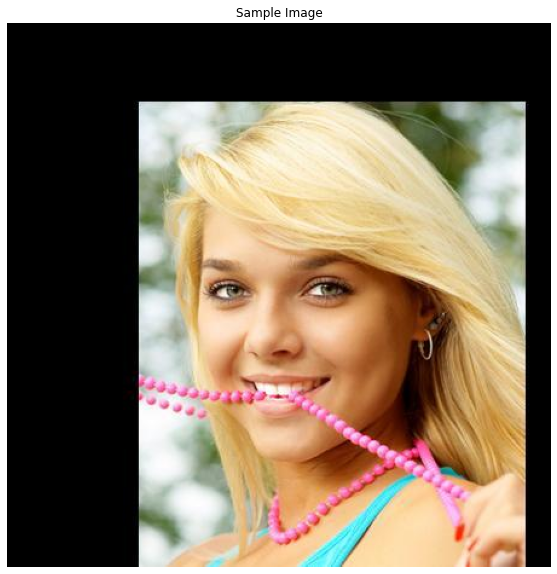

FACE NUMBER: 1
-----------------------
LEFT EYE LANDMARKS:n
x: 0.5566527247428894
y: 0.4842158854007721
z: -0.02884502336382866

x: 0.5729174017906189
y: 0.47733375430107117
z: -0.03473686799407005

RIGHT EYE LANDMARKS:n
x: 0.39028483629226685
y: 0.4799760580062866
z: 0.02238086611032486

x: 0.3772870898246765
y: 0.4914472699165344
z: 0.046839162707328796



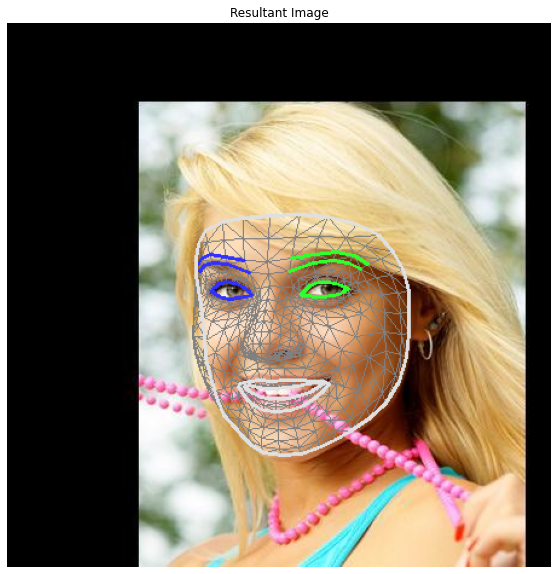

In [16]:
# choosing random image
import matplotlib.pyplot as plt
import itertools

mp_face_mesh = mp.solutions.face_mesh

face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

mp_drawing_styles = mp.solutions.drawing_styles

random_file = 'image00098'
sample_img = cv2.imread('/content/drive/MyDrive/Ml1_project/Images/'+random_file+'.jpg')

plt.figure(figsize = [10, 10])

plt.title("Sample Image")
plt.axis('off')
plt.imshow(sample_img[:,:,::-1])
plt.show()


face_mesh_results = face_mesh_images.process(sample_img[:,:,::-1])

LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))

if face_mesh_results.multi_face_landmarks:

    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):

        print(f'FACE NUMBER: {face_no+1}')
        print('-----------------------')

        print(f'LEFT EYE LANDMARKS:n')

        for LEFT_EYE_INDEX in LEFT_EYE_INDEXES[:2]:

            print(face_landmarks.landmark[LEFT_EYE_INDEX])

        print(f'RIGHT EYE LANDMARKS:n')

        for RIGHT_EYE_INDEX in RIGHT_EYE_INDEXES[:2]:

            print(face_landmarks.landmark[RIGHT_EYE_INDEX])


img_copy = sample_img[:,:,::-1].copy()

if face_mesh_results.multi_face_landmarks:

    for face_landmarks in face_mesh_results.multi_face_landmarks:

        mp_drawing.draw_landmarks(image=img_copy, 
                                  landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_TESSELATION,
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
        
        mp_drawing.draw_landmarks(image=img_copy, landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_CONTOURS,
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

fig = plt.figure(figsize = [10, 10])
plt.title("Resultant Image");
plt.axis('off')
plt.imshow(img_copy)
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# cap = cv2.VideoCapture('/content/drive/MyDrive/MY CV/20220329_121117.mp4')

# # Initiate holistic model

# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)

#         # # To improve performance
#         # image.flags.writeable = False

#         # face_landmarks
        
#         # Recolor image back to BGR for rendering
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
# # Apply our model for find yaw pitch and roll

#         # Draw face landmarks
#         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)

#         # Draw lines
#         cv2_imshow('Raw Webcam Feed', image)

#         if cv2.waitKey(25) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()